In [2]:
import numpy as np
from control.matlab import *
import scipy as sp
import matplotlib.pyplot as plt
from scipy.linalg import eig


12.1

In [6]:
#12.2_intro_2

#Constants 

s = tf([1,0], [1])

Jb = 400
Jp = 1000
k = 10
b = 5

#tf from left to right

H1 = 1/(Jb*s)
H2 = 1/s
H3 = k*s/s
H4 = b*s/s
H5 = 1/(Jp*s)
H6 = 1/s

H = append(H1, H2, H3, H4, H5, H6)

Q = [[1, -3, -4],
               [2, 1, 0],
               [3, 2, -6],
               [4, 1, -5],
               [5, 3, 4],
               [6, 5, 0]]

inputs = [1]
outputs = [1, 2, 5, 6]

#input = T
#output 1 = theta b dot
#output 2 = theta b
#output 3 = theta p dot
#output 4 = theta p

sys = connect(H, Q, inputs, outputs)

print(sys)





A = [[-0.0125  -1.       0.05     1.     ]
     [ 0.025    0.       0.       0.     ]
     [ 0.00125  0.1     -0.005   -0.1    ]
     [ 0.       0.       0.1      0.     ]]

B = [[0.1]
     [0. ]
     [0. ]
     [0. ]]

C = [[0.025 0.    0.    0.   ]
     [0.    1.    0.    0.   ]
     [0.    0.    0.1   0.   ]
     [0.    0.    0.    1.   ]]

D = [[0.]
     [0.]
     [0.]
     [0.]]



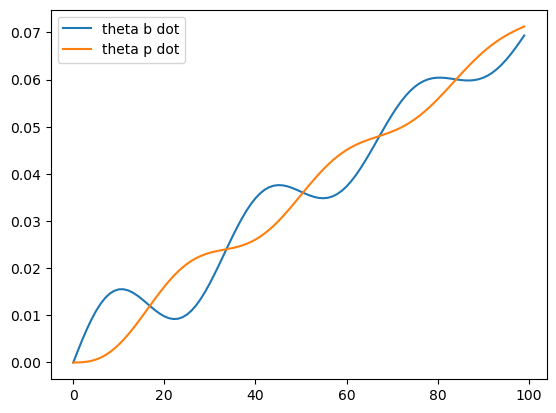


Input 1 to output 1:
  0.0025 s^3 + 1.25e-05 s^2 + 2.5e-05 s
------------------------------------------
s^4 + 0.0175 s^3 + 0.035 s^2 - 2.168e-19 s

Input 1 to output 2:
          0.0025 s^2 + 1.25e-05 s + 2.5e-05
------------------------------------------------------
s^4 + 0.0175 s^3 + 0.035 s^2 + 2.711e-19 s - 5.421e-20

Input 1 to output 3:
         1.25e-05 s^2 + 2.5e-05 s + 2.894e-22
------------------------------------------------------
s^4 + 0.0175 s^3 + 0.035 s^2 + 4.066e-19 s - 3.003e-19

Input 1 to output 4:
        -9.107e-20 s^2 + 1.25e-05 s + 2.5e-05
------------------------------------------------------
s^4 + 0.0175 s^3 + 0.035 s^2 - 1.355e-19 s - 1.084e-19

_____Eigenvalue______ Damping___ Frequency_
  -0.00875   +0.1869j    0.04677     0.1871
  -0.00875   -0.1869j    0.04677     0.1871
         0                     1         -0
         0                     1         -0
0.012437497443317434


c:\Users\kaspe\anaconda3\lib\site-packages\control\lti.py:126: RuntimeWarning: invalid value encountered in divide
  Z = -real(splane_poles)/wn


In [11]:
#12.1_intro_3

t = np.arange(0, 100, 1)

y_vel_b, t = step(sys, t, output = 0)
y_vel_p, t = step(sys, t, output = 2)


plt.plot(t, y_vel_b, label = "theta b dot")
plt.plot(t, y_vel_p, label = "theta p dot")
plt.legend()
plt.show()

sys_tf = tf(sys)

print(sys_tf)

damp(tf([0.0025, 1.25e-05, 2.5, 0, 0], 
        [1, 0.0175, 0.035, 0, 0]))


print(np.max(abs(y_vel_b - y_vel_p)))

1.0573703834555623
Peak = 6.319406909138355
Gain = 0.24266100950824154
-56.07948798994276
0.18696605205016747 0.20056282543840326


C:\Users\kaspe\AppData\Local\Temp\ipykernel_16116\2114895302.py:18: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  print("Peak =", 20*sp.log10(2.07))


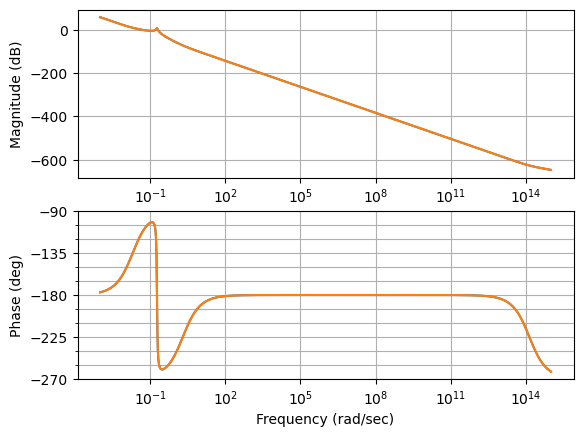

In [24]:
#12.1_intro_4

Kp = 1
Kd = 50

Hp = tf(sp.matrix([0, 0, 0, 1])*sys)

# with controller
HpHc = Hp * (1+50*s)

bode(HpHc)

mag, phase, omega = bode(HpHc)
gm, pm, wp_180, wg_1 = margin(HpHc)

print(10**(gm/20))

print("Peak =", 20*sp.log10(2.07))

#Assume gain margin occurs at the peak
#for only 6dB gain margin reduce it by the peark value
#-6.319 dB

print("Gain =", 10**((-6-6.3)/20))

print(pm)

print(wp_180, wg_1)




12.2

C:\Users\kaspe\AppData\Local\Temp\ipykernel_16116\2077479885.py:12: DeprecationWarning: scipy.logspace is deprecated and will be removed in SciPy 2.0.0, use numpy.logspace instead
  mag, phase, omega = bode(Hno, sp.logspace(1, 2, 500))


[0.06368496]
24.93409369951879 39.55436244734702


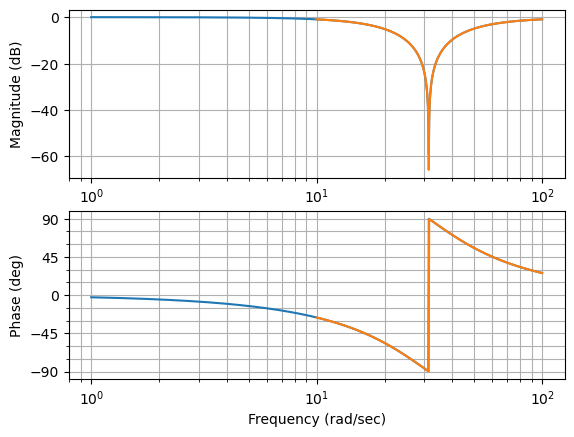

In [29]:
#12.2_notch_3

import numpy as np
t = np.arange(0, 0.5, 0.001)
u = t - np.mod(t, 0.1);

wno = 10*np.pi
z1 = 0
z2 = 0.7

Hno = (1 + 2*z1*s/wno + (s*s/(wno*wno)))/(1 + 2*z2*s/wno + (s*s)/(wno*wno))

bode(Hno)
mag, phase, omega = bode(Hno, sp.logspace(1, 2, 500))


y, t, x = lsim(Hno, u, t)


print(y[t == 0.11])

tendb = 10**(-10./20)

print(omega[mag < tendb][0], omega[mag < tendb][-1])

ValueError: array of sample points is empty

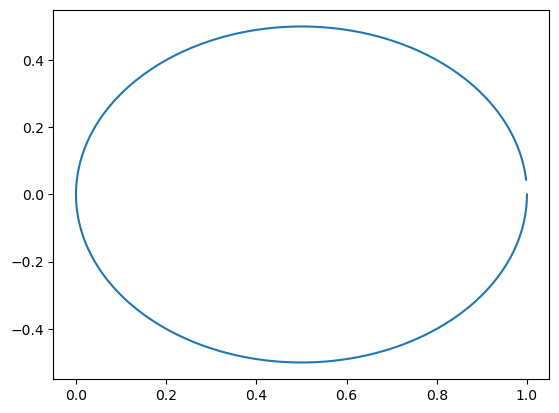

In [30]:
nyquist(Hno)

c:\Users\kaspe\anaconda3\lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "
C:\Users\kaspe\AppData\Local\Temp\ipykernel_16116\2460029704.py:15: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  print(wp, pm, 20*sp.log10(gm))


0.31349169644690883 5.762299919129987 83.05043770903657


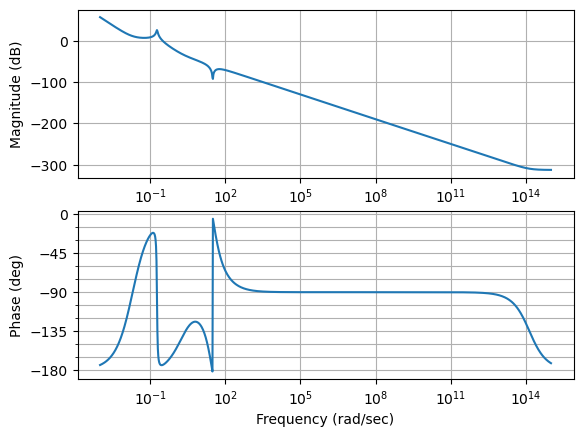

In [33]:
#12.2_notch_4

wno = 0.19
z1 -0.05
z2 = 0.7

Kp = 1
Kd = 50

Gpd = Kp*(1 + (Kd/Kp)*s)

sys2 = Gpd*Hno*HpHc

bode(sys2)

gm, pm, wg, wp = margin(sys2)
print(wp, pm, 20*sp.log10(gm))

C:\Users\kaspe\AppData\Local\Temp\ipykernel_16116\3964844935.py:30: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  t = sp.arange(0, 250.1, 0.1)
c:\Users\kaspe\anaconda3\lib\site-packages\control\timeresp.py:935: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
C:\Users\kaspe\AppData\Local\Temp\ipykernel_16116\3964844935.py:48: DeprecationWarning: scipy.logspace is deprecated and will be removed in SciPy 2.0.0, use numpy.logspace instead
  mag, phase, w = bode(Hclosed, sp.logspace(-3, 0, 500))
C:\Users\kaspe\AppData\Local\Temp\ipykernel_16116\3964844935.py:51: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  print("resonance", 20*sp.log10(mag.max()))


overshoot 30.055943976375858
at 250 250.00404925615965
resonance 2.6171550926017186
bandwidth 0.019679066820468268
_____Eigenvalue______ Damping___ Frequency_
 -0.008608    +0.186j    0.04624     0.1862
 -0.008608    -0.186j    0.04624     0.1862
  -0.08782   +0.1082j       0.63     0.1394
  -0.08782   -0.1082j       0.63     0.1394
  -0.04532  +0.01142j     0.9697    0.04674
  -0.04532  -0.01142j     0.9697    0.04674


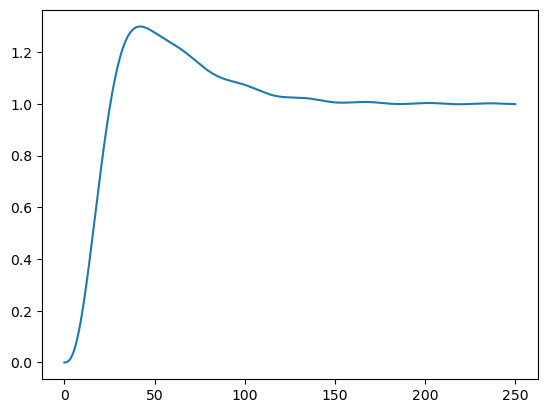

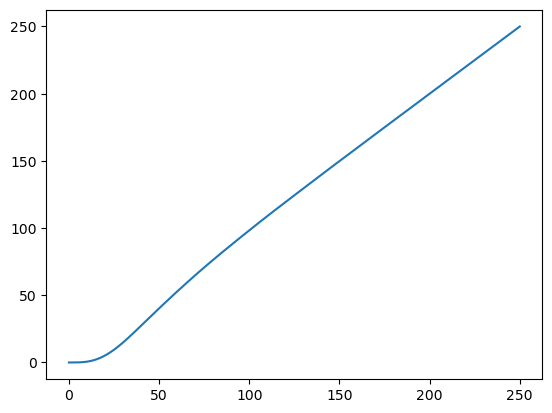

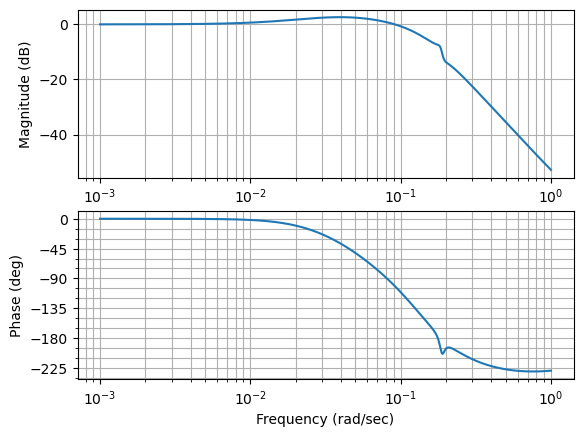

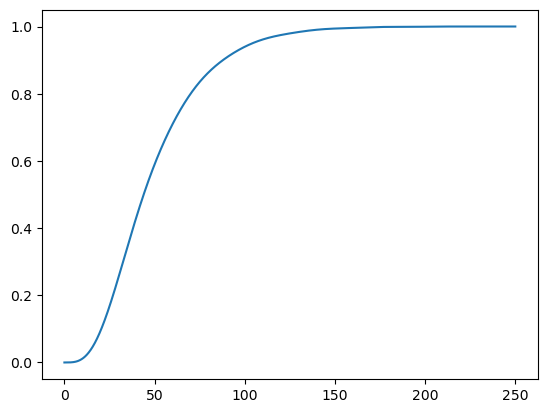

In [34]:
#12.2_notch_5

# create the closed-loop system, assuming the open-loop one
# from the previous question is still available
# Note: the one with the gain 1.63
from control.matlab import step, damp, bode, lsim
import matplotlib.pyplot as plt
import scipy as sp

# matched notch filter
s = tf([1, 0], [1])
wno = 0.19
z1 = 0.05
z2 = 0.7
Hno = (1+2*z1/wno*s+s**2/wno**2)/(1+2*z2/wno*s+s**2/wno**2)

# the controller, Kp = 1 for now
Kp = 1.63
tau_PD = 50
Hc = (1 + tau_PD*s)*Kp

# start with the basic satellite model sat1, and get the 
# payload attitude response
Hp = tf(sp.matrix([0, 0, 0, 1])*sat1)

# total open loop
Hol = Hc*Hno*Hp

Hclosed = Hol.feedback(1)

# step input
t = sp.arange(0, 250.1, 0.1)
y, t = step(Hclosed, t)
f0 = plt.figure()
plt.plot(t, y)

# the overshoot
print("overshoot", y.max()/y[-1]*100 - 100)

# ramp input
y, t, x = lsim(Hclosed, t, t)
f1 = plt.figure()
plt.plot(t, y)

# value at 250
print("at 250", y[t == 250.0][0])

# closed-loop frequency response
f2 = plt.figure()
mag, phase, w = bode(Hclosed, sp.logspace(-3, 0, 500))

# resonance peak in db
print("resonance", 20*sp.log10(mag.max()))

# bandwidth
print("bandwidth", w[mag > 10**(-3./20)][-1]/(2*sp.pi))

# damping
damp(Hclosed)

# alternative control structure
Hclosed2 = (Kp * Hno * Hp).feedback(1+tau_PD*s)
y, t = step(Hclosed2, t)
f3 = plt.figure()
plt.plot(t, y)

plt.show()